In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [2]:
#Load/preview datas
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [3]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

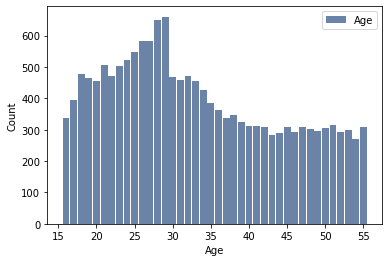

In [4]:
age=thinkstats2.Hist(df["Age"], label="Age")
thinkplot.Hist(age)
thinkplot.Config(xlabel="Age", ylabel="Count")

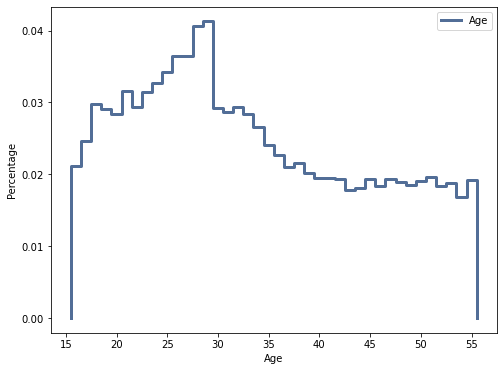

<Figure size 576x432 with 0 Axes>

In [5]:
agepmf=thinkstats2.Pmf(age)
thinkplot.PrePlot(cols=1)
thinkplot.Pmfs([agepmf])
thinkplot.Show(xlabel="Age", ylabel="Percentage")

#### What fraction of the people in the data are 51? What fraction are older than 51?

In [6]:
age_51 = df[df["Age"] == 51]
age_51plus =df[df["Age"] > 51]
print(age_51["Age"].count())
print(age_51plus["Age"].count())

print("Fraction of people that are age 51:", "314/15992")
print("Fraction of people that are over age 51:", "1171/15992")


314
1171
Fraction of people that are age 51: 314/15992
Fraction of people that are over age 51: 1171/15992


314/15992 people are 51 years old. 1171/15992 are older than 51. 

##### What is the median age?

In [7]:
print(df["Age"].median())

31.0


Median age is 31 years old.

##### Does the distribution of the sample data seem to mirror the working age population?

Yes, upon a quick Google search, typical age demographics of USA, for example, have a normal distrubution skewed slightly to the left. The majority of the working class are around 20-40 years old, with a peak at around 30 years old, as shown by the histogram above. So the data used here is a pretty good representation of a typical working age population. 

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

In [8]:
lessthanhighschool=df[df["Eduacation"]=="LessThanHighSchool"]
print('{:.1%}'.format((lessthanhighschool["Eduacation"].count())/15992), "have an education of less than high school.")

intermediate=df[df["Eduacation"]=="Intermediate"]
print('{:.1%}'.format((intermediate["Eduacation"].count())/15992), "have an education of intermediate.")

highschool=df[df["Eduacation"]=="HighSchool"]
print('{:.1%}'.format((highschool["Eduacation"].count())/15992), "have an education of high school.")

graduate=df[df["Eduacation"]=="graduate"]
print('{:.1%}'.format((graduate["Eduacation"].count())/15992), "have an education of graduate.")

postgraduate=df[df["Eduacation"]=="PostGraduate"]
print('{:.1%}'.format((postgraduate["Eduacation"].count())/15992), "have an education of post-graduate.")

29.6% have an education of less than high school.
16.9% have an education of intermediate.
39.1% have an education of high school.
8.5% have an education of graduate.
5.8% have an education of post-graduate.


In [9]:
black=df[df["Race"]=="black"]
print('{:.1%}'.format((black["Race"].count())/15992), "of people are black.")

hispanic=df[df["Hisp"]=="hispanic"]
print('{:.1%}'.format((hispanic["Hisp"].count())/15992), "of people are Hispanic.")

maritalstatus=df[df["MaritalStatus"]=="Married"]
print('{:.1%}'.format((maritalstatus["MaritalStatus"].count())/15992), "of people are married.")

nodegree=df[df["Nodeg"]==1]
print('{:.1%}'.format((nodegree["Nodeg"].count())/15992), "of people have no degree.")

7.4% of people are black.
7.2% of people are Hispanic.
71.2% of people are married.
29.6% of people have no degree.


Education: According to 2021 US Census Bureau, 8.9% of people have a lower than a high school diploma, 27.9% have a high school diploma, 23.5% have a bachelor's degree, and 14.4% have a post-graduate degree. In our data, 29.6% have lower than a high school diploma, 39.1% have a high school diploma, 8.5% have a bachelor's degree, and 5.8% have a post-graduate degree.

Race: 13.6% of people are black in USA based on a quick Google search, 7.4% of people are black in our data. 

Hisp: 18.7% of people are Hispanic in USA based on a quick Google search, 7.2% of people are black in our data. 

MaritalStatus: 53% of people in USA are married according to pewresearch.org, 71% are married in our data. 

Nodeg: In our data, a Nodeg value of 1 is only assigned to people with an Education of "LessThanHighSchool". This means that in the context of this data, only people who have an education of less than high school is considered no degree. According to 2021 US Census Bureau, 8.9% of people in USA have no degree. In our data, 29.6% of people have no degree. 

Conclusion: Based on the comparisons between a typically US population and our data, our data is not a good representative sample of the US population. Our data contains more less people who are black or hispanic compared to the typical US population. Our data contains more people who are married than the typical US population. Our table contains far more people who did not finish High School than the typical US population. Given these factors, it is reasonable to conclude that our data is a poor representation of the US population. 

Sources:
https://www.pewresearch.org/social-trends/2021/10/05/rising-share-of-u-s-adults-are-living-without-a-spouse-or-partner/#:~:text=Americans'%20marital%20and%20living%20arrangements,to%209%25%20in%202019)

https://www.census.gov/newsroom/press-releases/2022/educational-attainment.html


##### Demographic Conclusion


### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.
    <ul>
    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

##### Plot Earnings Data

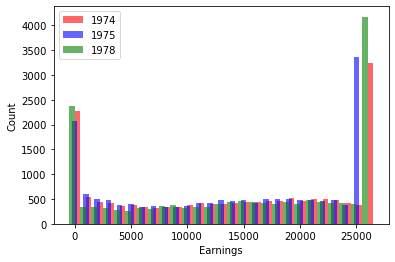

In [10]:
earning1974 = thinkstats2.Hist(round(df["Earnings_1974"], -3), label="1974")
earning1975 = thinkstats2.Hist(round(df["Earnings_1975"], -3), label="1975")
earning1978 = thinkstats2.Hist(round(df["Earnings_1978"], -3), label="1978")
#Before plotting earnings histogram, the values need to be round to the nearest thousands or it will try to plot every distinct earning value. 
thinkplot.Hist(earning1974, align="left", width=500, color="red")
thinkplot.Hist(earning1975, align="center", width=500, color="blue")
thinkplot.Hist(earning1978, align="right", width=500, color="green")

thinkplot.Config(xlabel = "Earnings", ylabel = "Count")

Conclusion: The histogram shows that the top earners (People who earned more than 25000 dollars) increased significantly from 1974 to 1978. This is shown by the green bar (1978) in the histogram being significantly higher than the red bar (1974) or the blue bar (1975).

As a conclusion, there seems to be a large jump in the number of people earning near the top end, around 25000 dollars. Otherwise the distributions are pretty similar. 

##### What to Investigate Further


In [11]:
black_effect=df[df["Race"]=="black"]
notblack_effect=df[df["Race"]=="NotBlack"]

hispanic_effect=df[df["Hisp"]=="hispanic"]
nothispanic_effect=df[df["Hisp"]=="NotHispanic"]

married_effect=df[df["MaritalStatus"]=="Married"]
notmarried_effect=df[df["MaritalStatus"]=="NotMarried"]

degree_effect=df[df["Nodeg"]==1]
nodegree_effect=df[df["Nodeg"]==0]


#For each category, I took the median earnings in 1978 between different groups of people and subtracted them. 
#I repeated this process for each category and the category with the greatest differnce would mean that it has the greatest effect size on earnings in 1978. 
print("Difference in median earnings between black people and non black people in 1978 is", (notblack_effect["Earnings_1978"].median())-(black_effect["Earnings_1978"].median()))
print("Difference in median earnings between hispanic people and non hispanic people in 1978 is", (nothispanic_effect["Earnings_1978"].median())-(hispanic_effect["Earnings_1978"].median()))
print("Difference in median earnings between married people and non married people in 1978 is", (married_effect["Earnings_1978"].median())-(notmarried_effect["Earnings_1978"].median()))
print("Difference in median earnings between people with a degree and people without a degree in 1978 is", (nodegree_effect["Earnings_1978"].median())-(degree_effect["Earnings_1978"].median()))

Difference in median earnings between black people and non black people in 1978 is 4778.23
Difference in median earnings between hispanic people and non hispanic people in 1978 is 2999.7800000000007
Difference in median earnings between married people and non married people in 1978 is 9682.806999999997
Difference in median earnings between people with a degree and people without a degree in 1978 is 6280.340000000002


Conclusion: since the difference in median earnings between married people and non married people is the highest of the 4 categories, marital status has the greatest size effect on earnings in 1978. 

Furthur investigation: in this question I used the difference in median earnings instead of mean earnings because there are too many people who earn 0 dollars and >25000 dollars, as shown in the histogram in question 1. Using the mean of earnings would be a poor representation of the group because of these outliers, so I opted to use the median instead. Unfortunately using the difference in median earnings between 2 groups doesn't account for the standard deviation in each data group. 

A better way to compare effect size could be to use Cohen's d formula to compare the effect size of 2 means. Cohen's d divides the difference between 2 means by the pooled standard deviations of the 2 groups, so the effect size between the 2 groups can be compared while accounting for standard deviation in the data. The formula is as follows: 

d=[(mean 1)-(mean 2)]/[(((standard deviation 1)^2)+((standard deviation 1)^2))/2]^(1/2)

The problem is that I need to use the mean for this calculation and the outliers of earners of 0 dollars and >25000 dollars will skew the mean. So for this formula to work I would need to cut out the outliers which I don't think is a good idea because realistically people who earn $0 and >$25000 are still part of the demographic. 

Source: https://toptipbio.com/cohens-d/

##### Histogram and PMF

Did not do this question per instructor's instructions. 

In [12]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

##### Differences in Median Income, and Theory on Why


Did not do this question per instructor's instructions. 

##### Outliers

In [13]:
zero_earnings = df[df["Earnings_1978"] == 0]
print("Number of people who earn $0:",zero_earnings["Earnings_1978"].count())

high_earnings = df[df["Earnings_1978"] > 25000]
print("Number of people who earn more than $25k:",high_earnings["Earnings_1978"].count())


Number of people who earn $0: 2172
Number of people who earn more than $25k: 4363


##### Outlier Conclusions


There are 2 notable outliers in our data, people who earn 0 dollars and people who earn more than 25000 dollars. There are 2172/15992 (13.58%) people who earn 0 dollars and 4363/15992 (27.28%) people who earn more than 25000 dollars. Combined these 2 groups of people account for 40.68% of all earners in our data. This would significantly skew the mean earnings as our data sample no longer follows a normal distribution. So doing analysis on this data using the mean will yield inaccurate results.